# Made by Group Members:
# 1. Ehtesham Ashraf (MTEG230090)

# 2. Abdul Qadir (MTEG230077)

# **Exploratory Data Analysis on 'data_job_posting.csv**

Importing required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset from .csv file as pandas dataframe

In [2]:
df2 = pd.read_csv('D:\Jupyter Notebooks\data_job_posting.csv')
df2

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Finding no. of missing values in each column

In [3]:
for col in df2:
  print("No. of missing values in ",col,"=",df2[col].isna().sum())

No. of missing values in  job_id = 0
No. of missing values in  title = 0
No. of missing values in  location = 346
No. of missing values in  department = 11547
No. of missing values in  salary_range = 15012
No. of missing values in  company_profile = 3308
No. of missing values in  description = 1
No. of missing values in  requirements = 2695
No. of missing values in  benefits = 7210
No. of missing values in  telecommuting = 0
No. of missing values in  has_company_logo = 0
No. of missing values in  has_questions = 0
No. of missing values in  employment_type = 3471
No. of missing values in  required_experience = 7050
No. of missing values in  required_education = 8105
No. of missing values in  industry = 4903
No. of missing values in  function = 6455
No. of missing values in  fraudulent = 0


After removing all rows with atleast one missing value, the rest that remain are just 774 out of 17,880.

In [4]:
df3 = df2.dropna()
df3.shape

(774, 18)

Checking for any duplicate row; No duplicate rows found

In [5]:
duplicate = df2[df2.duplicated()]
duplicate

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent


In [125]:
df2['department'].str.strip().str.upper().value_counts()

SALES                  582
ENGINEERING            512
MARKETING              421
OPERATIONS             276
IT                     231
                      ... 
DOJO                     1
IP SECUIRTY              1
DIGITAL DESIGN           1
BIZDEV/PRODUCT           1
ADMINISTRATIVE DEPT      1
Name: department, Length: 1222, dtype: int64

No. of Unique Department names found in 'department' column = 1222

Most of the job postings belong to the Sales, Engineering, Marketing, Operations, IT, etc.

## **Univariate Exploratory Data Analysis**

**Univariate EDA on 'salary_range' column**

1. By taking a glance at the dataset, it looks like the values in 'salary-range' column are of the type 'integer-integer'.
2. A function is created to check if all the values in that column follow the same format using regular expressions. It was found that 27 values do not follow this format.
3. When printed, they were identified as dates in a year except 1 which was just single integer value.

In [7]:
import re
def is_valid_format(value):
    return isinstance(value, str) and bool(re.match(r'^\d+-\d+$', value))

non_integer_range_values = df2['salary_range'].dropna().apply(is_valid_format)
n = pd.DataFrame(non_integer_range_values)
n = n[n['salary_range'] == False]
print(len(n))
print("Index : salary_range")
for index in list(n.index):
    print(index,":", df2.loc[index, 'salary_range'])

27
Index : salary_range
159 : 9-Dec
1884 : 3-Apr
1981 : 4-Apr
2313 : 15-Oct
4299 : 8-Sep
5538 : 40000
9124 : 4-Jun
9902 : 10-Oct
9911 : 20-Oct
10316 : 18-Jun
10785 : 10-Oct
10788 : 11-Nov
10860 : 10-Nov
10883 : 10-Oct
10889 : 10-Nov
10896 : 10-Oct
10905 : 10-Nov
11361 : 11-Dec
11495 : 2-Apr
11606 : 10-Nov
12421 : 10-Oct
13449 : 11-Nov
13482 : 2-Jun
14196 : 20-Oct
15483 : 10-Oct
17233 : 10-Nov
17656 : 25-Dec


Since, the 'salary_range' column contains strings in which upper and lower limits are seperated by '-', they are seperated and their average is taken. This process eliminates those wrong data as dates, since when typecasting as int, error is generated due to which the value is replaced by NaN. A new column 'Avg_Salary' is added to the dataframe to store these average salary values for further analysis.

In [8]:
import numpy as np
avg = []
for r in df2['salary_range']:
  try:
    l = int(r.split('-')[0])
    h = int(r.split('-')[1])
    avg.append((l+h)/2)
  except:
    avg.append(np.nan)

In [9]:
df2['Avg_Salary'] = avg
pd.options.display.float_format = '{:.2f}'.format
df2['Avg_Salary'].describe()

count         2841.00
mean        664074.43
std       22373525.15
min              0.00
25%          22000.00
50%          45000.00
75%          72500.00
max     1000000000.00
Name: Avg_Salary, dtype: float64

The statistical summary of the 'Avg_Salary' column is printed.
**Observations:**
1. The unit of currency for the data is not mentioned. It is difficult to guess since the dataset contains job posting data from several countries around the world.
2. This column contains only 2841 values out of the total 17880 rows in dataset, which shows that almost
3. The mean salary of the jobs is 6,64,074.43. However, this value might be skewed by extremely high values, as indicated by the large standard deviation.
4. The standard deviation of the 'Avg_Salary' column is very high, at 22,373,525.15. This indicates that the salaries vary widely from the mean, suggesting a significant amount of variability or dispersion in the data.
5. The minimum salary listed in the dataset is 0. This could either indicate missing or erroneous data, or it might represent unpaid positions or internships.
6. The maximum salary listed in the dataset is a very high value of 1,000,000,000. This value seems unrealistic and could be an outlier or data entry error.

Since the max and min values in this column are extreme, a box plot is plotted to visualize the outliers.

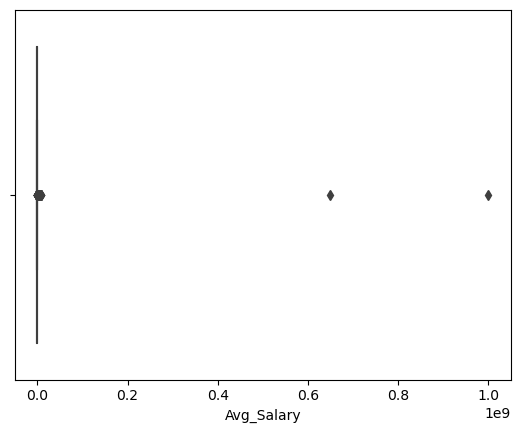

In [10]:
df3 = df2.dropna(subset='Avg_Salary')
sns.boxplot(x='Avg_Salary', data=df3)
plt.show()

**Observation:**

2 major outliers were found whose values were 1 billion and around 600 million. These seem like unrealistic values and thus their indices were found and they were dropped from the dataset.*italicized text*

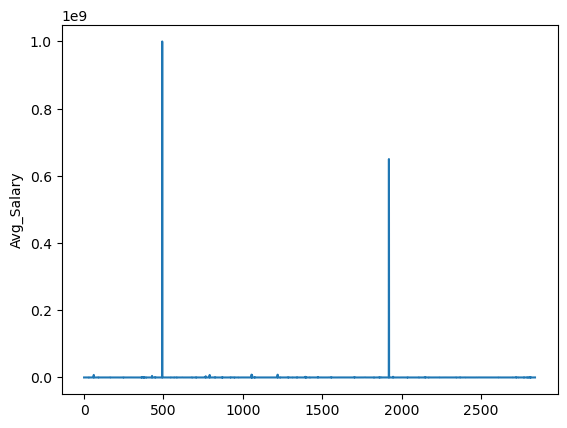

In [11]:
plt.plot(list(df3['Avg_Salary']))
plt.ylabel('Avg_Salary')
plt.show()

In [12]:
print(np.where(df2['Avg_Salary']>0.2e9)[0])

[ 3139 12251]


In [13]:
df2.index = range(len(df2))
df2.loc[[3139]]
df2 = df2.drop(index=[3139,12251])

A bar plot was plotted again to check for other outliers. After removing the 2 outliers, the order of magnitude of max value dropped from 10^9 to 10^6. Now no major outliers were observed.

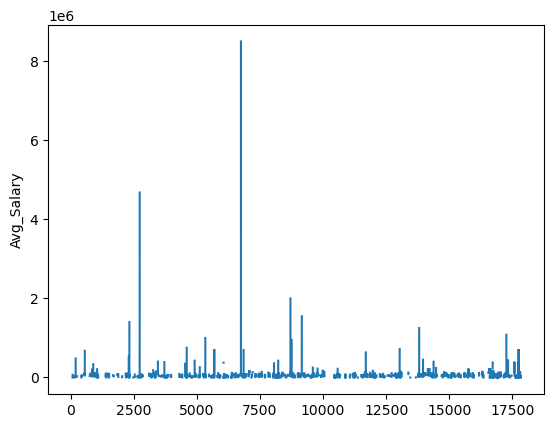

In [14]:
plt.plot(list(df2['Avg_Salary']))
plt.ylabel('Avg_Salary')
plt.show()

**Univariate EDA on 'company_profile' column**

Since, the 'company_profile' column contains long sentences, all the profiles are joined together in one string and a wordcloud graph is plotted to show which words occur most frequently among the profiles of all companies.

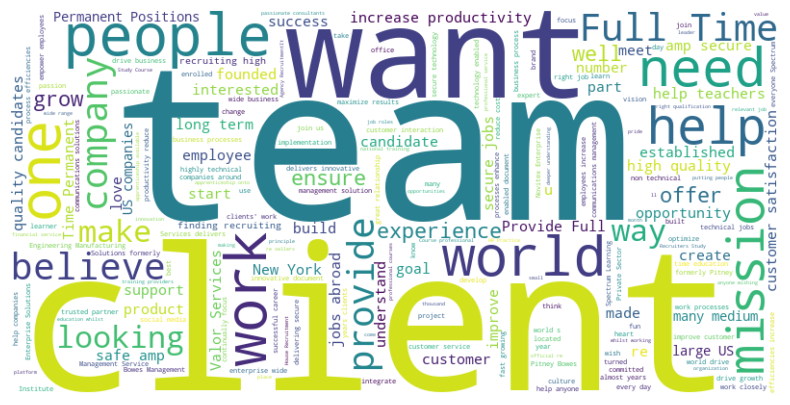

In [15]:
from wordcloud import WordCloud
all_desc = ' '.join(df2['company_profile'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_desc)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observation:**
1. The word 'team' occured the highest no. of times in the company profiles.
2. Other frequent occuring words are 'client', 'want', 'people', 'one', 'work','need', 'world', 'full time', 'company', etc.
3. The word “team” could represent the importance of teamwork and collaboration within a company, while the word “client” could represent the importance of maintaining good relationships with clients. Similarly, the word “quality” could represent the company’s commitment to delivering high-quality products or services, while the word “support” could represent the company’s dedication to providing excellent customer support.

**Univariate EDA on 'description' column**

Another Wordcloud is plotted for the 'descriptions' column as it also contains long sentences to show which words occur most frequently among all job descriptions.

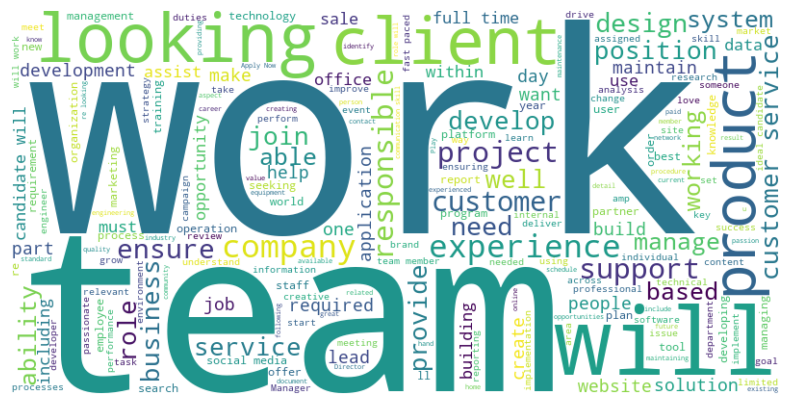

In [16]:
all_desc = ' '.join(df2['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_desc)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observation:**
1. Some of the words included in the word cloud are “team”, “work”, “business”, “project”, “customer”, “role”, “ability”, “professional”, and “support”.The word 'work' occured the highest no. of times in the job descriptions.
2. These words can be associated with various job descriptions and can represent the skills, qualities, and responsibilities required for different roles. For example, the word “team” could represent the importance of teamwork and collaboration in a job.

**Univariate EDA on 'title' column**

Another Wordcloud is plotted for the 'title' column as it contains short to medium length strings to show which words occur most frequently among all job titles.

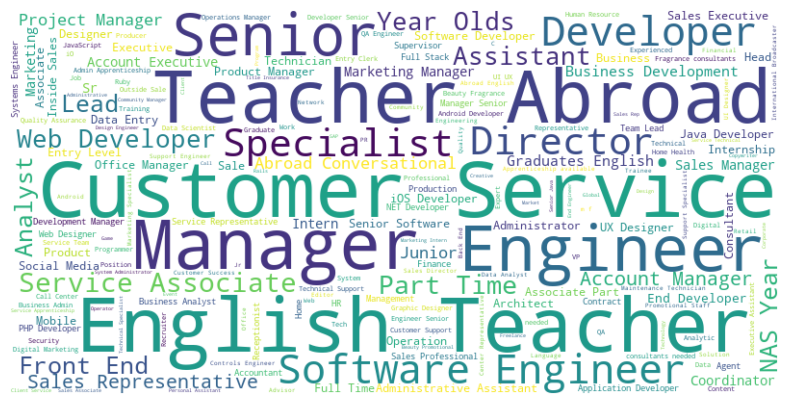

In [75]:
all_desc = ' '.join(df2['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_desc)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observations:**

The largest words in the word cloud are “Customer Service", "Manager”, "Engineer", “English Teacher”, "Director", "Specialist" and “Software Engineer”. These job titles represent some of the most common and in-demand roles in various sectors of the job market.

## **Multivariate Exploratory Data Analysis**

A function 'topavgsal' is created to do multivariate EDA on a column whose name is given as input in 'col', and the 'Avg_Salary' column as it is derived from an important numerical column 'salary_range' in the dataset. It plots a bar plot to visualize the dependence of salary on various other factors.

In [135]:
def topavgsal(col):
    sal_by_col = df2.groupby(col)['Avg_Salary'].mean().reset_index()
    sal_by_col.columns = [col, 'Avg_Salary']
    sal_by_col = sal_by_col.sort_values(by='Avg_Salary',ascending = False,ignore_index = True)
    sal_by_col.index +=1
    sal_by_col.plot(x=col, kind='bar')
    for i,value in enumerate(sal_by_col['Avg_Salary']):
        plt.text(i, value+1000,str(round(value)),ha='center', fontsize=8)

**Multivariate EDA on 'location' & 'Avg_Salary'**

1. By taking a glance at the dataset, it looks like the values in 'location' column are of the type '[Country Code], [State Code], [City Name]'.
2. A function is created to check if all the values in that column follow the same format by checking if the no. of commas is not equal to 2. It was found that 214 values do not follow this format. The first few are printed.
3. These values either only have the country code, or have more than 2 sub-locations.

In [17]:
unf = []
for l in df2['location'].dropna():
    if l.count(',') != 2:
        unf.append(l)
print(len(unf))
print(unf[0:10])

214
['IL, , Tel Aviv, Israel', 'US', 'US, CA, Menlo Park, CA', 'US, , Stocton, CA', 'US', 'US, CA, Bakersfield, CA / Mt. Poso', 'SA, 01, Riyadh, Olaya', 'US', 'EG, C, Cairo, Nasr City', 'GR, I, Neo Iraklio, Athens']


The strings are divided into 3 parts namely Country code, state code and city name and stored in 3 lists seperately. Any NaN value is replaced by ' '.

In [18]:
coun = []
state = []
city = []
for l in df2['location']:
    try:
        coun.append(l.split(',')[0].strip())
    except:
        coun.append(' ')
    try:
        state.append(l.split(',')[1].strip())
    except:
        state.append(' ')
    try:
        city.append(l.split(',')[2].strip())
    except:
        city.append(' ')

The list of countries is appended to the dataframe as a new column. It is then analyzed with 'Avg_Salary' column to find the countries with highest average job salary.

In [19]:
df2['Country'] = coun
sal_by_coun = df2.dropna(subset=['Avg_Salary']).groupby('Country').agg({'Avg_Salary': 'mean', 'required_education': 'size'}).reset_index()
sal_by_coun.columns = ['Country', 'Avg_Salary', 'No. of Jobs']
sal_by_coun = sal_by_coun.sort_values(by='Avg_Salary', ascending=False, ignore_index=True)
sal_by_coun.index += 1
sal_by_coun.head(10)

,Country,Avg_Salary,No. of Jobs
1,JP,4250000.00,2
2,NG,2000000.00,1
3,ZA,744642.86,7
4,DK,466562.50,8
5,IN,318698.28,88
6,AE,243333.33,3
7,ES,190333.33,3
8,AT,185000.00,1
9,SE,180000.00,2
10,EG,171425.00,12


**Observations:**
1. Japan (JP) had the highest average salary at 4.25 million, but the no. of jobs from Japan is just 2, so it does not give a general idea of the correct salary range.
2. Same goes with the next 3 in the list i.e., Nigeria (NG), South Africa (ZA) & Denmark (DK) as the no. of job postings in the dataset is very low.
3. At 5th, India (IN) has significantly higher no. of jobs than the rest, hence its average at 3,18,698.28 may be a generally true figure.

Now, It is further analysed to find which states in India have job postings with highest average salary. A new column is added to the dataframe storing the states of all locations.

In [20]:
df2['State'] = state

In [21]:
indian_states_df = df2[df2['Country'] == 'IN'].dropna(subset=['Avg_Salary']).groupby('State').agg({'Avg_Salary': 'mean', 'Country': 'size'}).reset_index()
indian_states_df.columns = ['State', 'Avg_Salary', 'No. of Jobs']
indian_states_df = indian_states_df.sort_values(by='Avg_Salary', ascending=False, ignore_index=True)
indian_states_df.index += 1
indian_states_df

,State,Avg_Salary,No. of Jobs
1,HR,1114750.00,2
2,RJ,950000.00,1
3,UP,900000.00,2
4,KL,825000.00,2
5,AP,437299.05,11
6,DL,386384.62,13
7,GJ,380427.80,5
8,MP,287777.78,9
9,TN,270000.00,4
10,,250000.00,1


**Observations**
1. Out of 29, job postings from only 13 states were observed in the dataset.
2. Haryana (HR), Rajasthan (RJ) & Uttar Pradesh are in the top 3 with highest average job salaries, although very few data is available from these states.
3. The dataset had the highest no. of job postings from Karnataka (KA) (16).

**Multivariate EDA on 'required_education' & 'Avg_Salary'**

Firstly, the 'required_education' column was analyzed to find out the frequency distribution of required education levels among the job postings in the dataset.

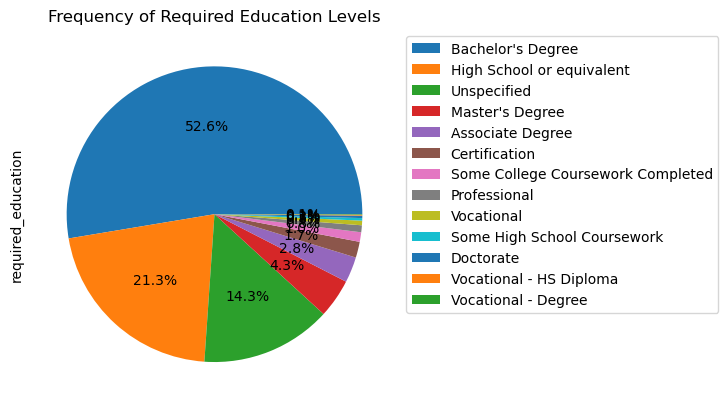

In [81]:
education_counts = df2['required_education'].value_counts()
education_counts.plot(kind='pie',autopct='%1.1f%%',labels=None)
plt.legend(labels=education_counts.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Frequency of Required Education Levels')
plt.show()

**Observation:**
1. More than half of the job postings in the dataset require atleast a bachelor's degree.
2. About 21.3% of the job postings i.e, around 3808 jobs require only a high school qualification.

This column is then analyzed with the 'Avg_Salary' column to find out which required education level in jobs resulted in highest average salaries. A bar plot is plotted to visualize the same.

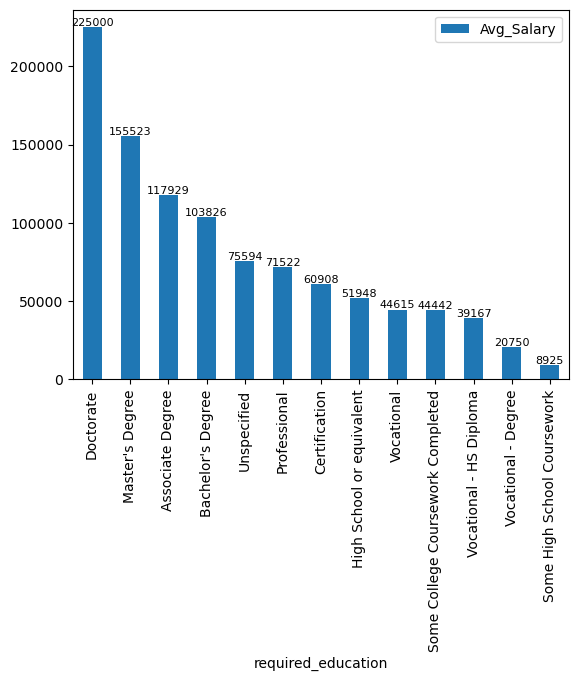

In [136]:
topavgsal('required_education')

**Observation:**
1. The jobs which required Doctorate level education had the highest average salary at 225,000.
2. The top 2 highest educationally qualified levels i.e., Doctorate & Master's degree have the top 2 highest average salary.

**Multivariate EDA on 'employment_type' & 'Avg_Salary'**

Firstly, the 'employment_type' column was analyzed to find out the frequency distribution of employment types among the job postings in the dataset.

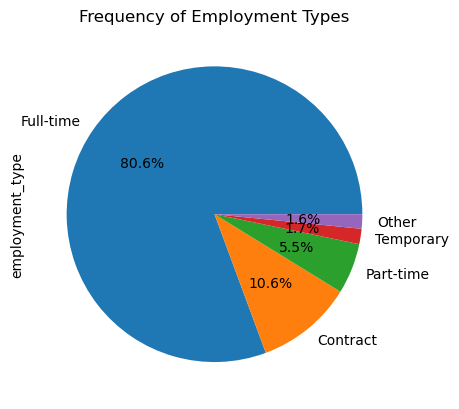

In [116]:
emp = df2['employment_type'].value_counts()
emp.plot(kind='pie',autopct='%1.1f%%')
plt.title('Frequency of Employment Types')
plt.show()

**Observation:**
A large majority of the job postings in the dataset (80.6%) are of full-time type.

This column is then analyzed with the 'Avg_Salary' column to find out which employment type in jobs had in highest average salaries. A bar plot is plotted to visualize the same.

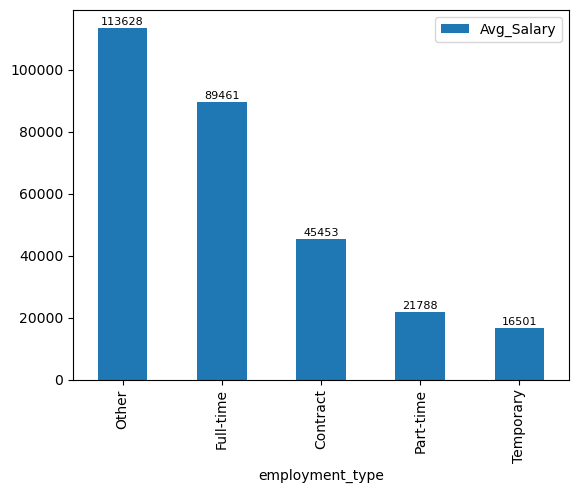

In [117]:
topavgsal('employment_type')


**Observation:**
1. The jobs belonging to Other employment type had the highest average salary at around 113,628.
2. Although the 'Other' employment type had far less no. of jobs in the dataset (1.6%) as compared to 'Contract' (10.6%), the average salary of it is more than twice of the latter.

**Multivariate EDA on 'required_experience' & 'Avg_Salary'**

Firstly, the 'required experience' column was analyzed to find out the frequency distribution of required experience among the job postings in the dataset.

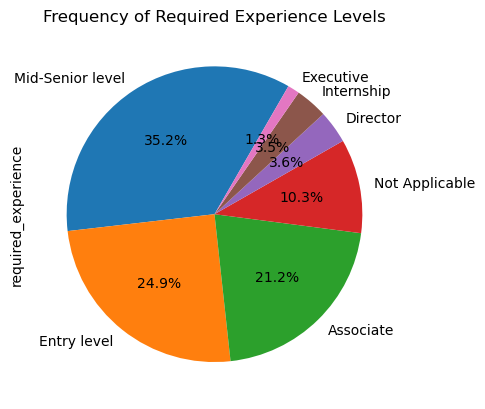

In [118]:
exp = df2['required_experience'].value_counts()
exp.plot(kind='pie',autopct='%1.1f%%', startangle = 60)
plt.title('Frequency of Required Experience Levels')
plt.show()

**Observations:**
1. Mid-Senior level with 35.2% indicates that the majority of job postings target candidates with a substantial amount of experience rather than newcomers in the field.
2. Entry Level occupies 24.9% of the chart, proving that there's still a significant number of opportunities for novices or individuals looking forward to stepping into the job market.
3. Associate at 21.2% suggests a healthy proportion of job roles seek mid-level professionals, demonstrating that some organizations are aiming for staff with some experience, but not necessarily at a very high level.
4. Not Applicable with 10.3% likely represents jobs that are more flexible regarding applicant experience levels, or it might include roles where the experience isn't a defining factor.
5. Director lies with a relatively smaller slice at 3.6%. These positions may pertain to more senior, leadership roles within companies and are less commonly advertised.
6. Internship represents 3.5% of the pie, indicating a smaller availability of internships as compared to more experienced roles.
7. Executive is the smallest segment at 1.3%. These positions are likely top-tier management roles with low turnover, hence their limited availability in job postings.
8. From all this, it appears that job postings lean toward hiring experienced professionals with a smaller, yet substantial, offering for entry-level and internship positions. However, there's a relatively minor share of job ads for top-tier leadership roles.


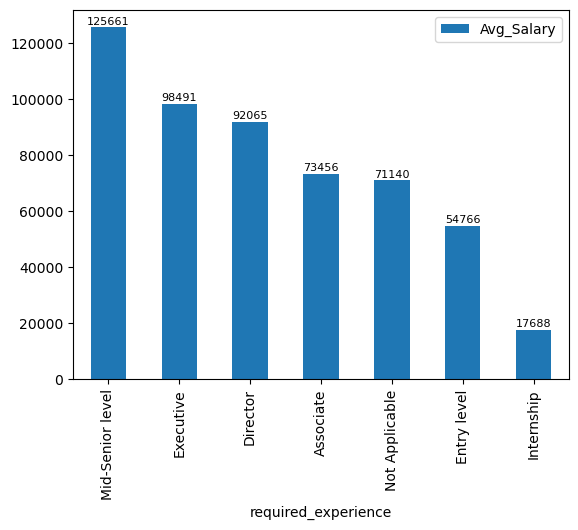

In [119]:
topavgsal('required_experience')

**Observations:**
1. Jobs that require Mid-Senior level experience have the maximum average salary at 125,661.
2. Jobs that require only Internship level experience have the minimum average salary, as expected.
3. This suggests that as the experience required in job postings increases, so do their average salaries.

**Multivariate EDA on 'function' & 'Avg_Salary' columns**

The 'function' column contains short strings which are job function classes. On printing the value counts, the unique no. of classes are 37. 

In [149]:
fnvc = df2['function'].value_counts()
print(len(fnvc))
fnvc

37


Information Technology    1749
Sales                     1466
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

The dependence of job function on Avg Salary is analyzed by taking the mean salary for each job function and plotting on a bar plot.

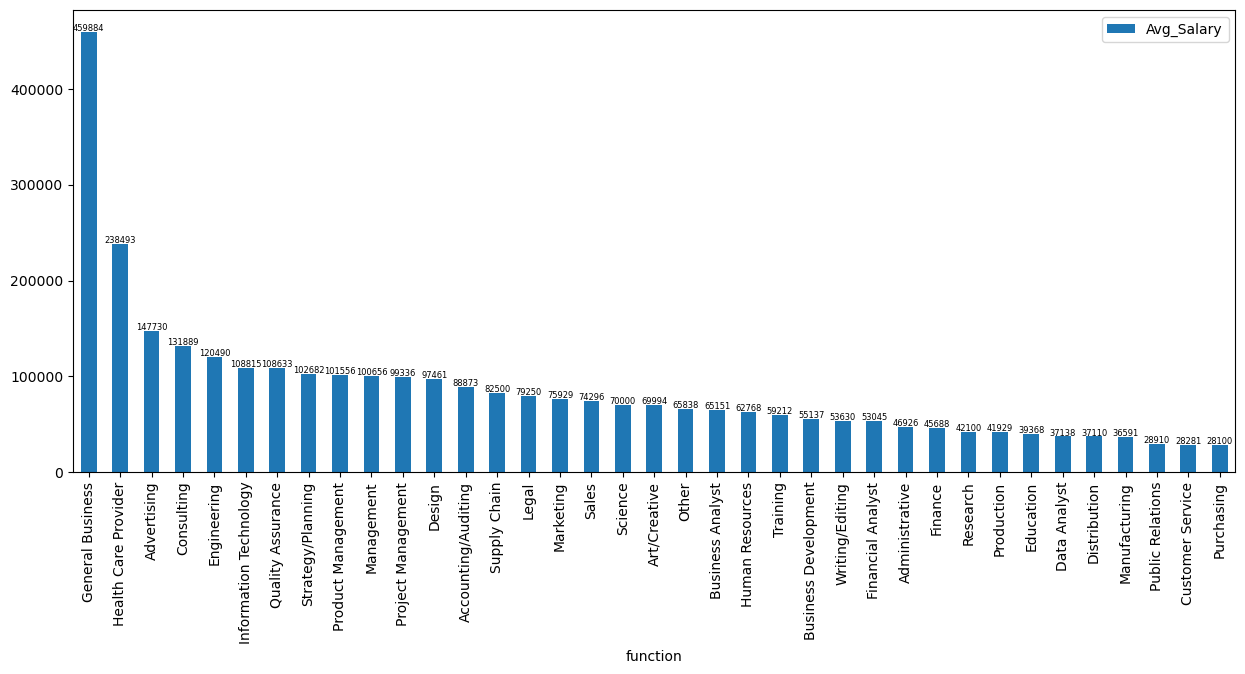

In [147]:
sal_by_fun = df2.groupby('function')['Avg_Salary'].mean().reset_index()
sal_by_fun.columns = ['function', 'Avg_Salary']
sal_by_fun = sal_by_fun.sort_values(by='Avg_Salary',ascending = False,ignore_index = True)
sal_by_fun.index +=1
sal_by_fun.plot(x='function', kind='bar', figsize=(15,6))
for i,value in enumerate(sal_by_fun['Avg_Salary']):
    plt.text(i, value+1000,str(round(value)),ha='center', fontsize=6)

**Observations:**
1. The average salaries across different job functions show a wide range, from around 28,100 for 'Purchasing' to nearly 459,884 for 'General Business'.
2. Roles that require specific skills or expertise, such as 'Engineering', 'Information Technology', and 'Quality Assurance', tend to have above-average salaries, possibly due to the demand for specialized knowledge.
3. 'Design', 'Art/Creative', and 'Writing/Editing' have decent average salaries, which could indicate that creativity and artistic skills are valued.
4. Functions like 'Customer Service', 'Public Relations', and 'Education' tend to have lower average salaries, which could be indicative of roles that might require less specialized skills or are commonly entry-level positions.

**Multivariate EDA on 'telecommuting' & 'Avg_Salary'**

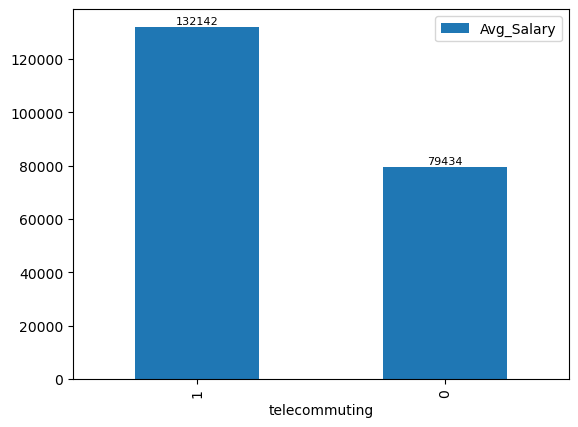

In [121]:
topavgsal('telecommuting')

The column 'telecommuting' only has values 0 and 1. It indicates if the job is to be done remotely. When the average salaries of both categories are compared, the average salary of work-from-home jobs is approx. 66.3% greater than on-site jobs.